In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
# Going to use Tesla as the stock I work with

ticker = "TSLA"
start_date = '2017-11-30'
end_date = '2020-11-30'

In [4]:
# stock_date = data.DataReader(ticker, 'iex', start_date, end_date)
# print(stock_date.shape)
# stock_date.head()

In [5]:
# Try using another aggregation api.

In [6]:
# Need to build out the RSI for this project as well.

In [7]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import yahoo_finance as yf

In [8]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False)
m.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')

In [9]:
#import the libraries
import math
import warnings
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from pandas_datareader import DataReader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM

warnings.filterwarnings("ignore")

In [10]:
#get the stock quote for the past 10 years
stock = input("Enter a stock ticker: ")
num_of_years = 10
start_date = datetime.datetime.now() - datetime.timedelta(days=int(365.25*num_of_years))
end_date = datetime.date.today()

Enter a stock ticker: AAPL


In [11]:
df = DataReader(stock, "yahoo", start_date, end_date)
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [12]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.206702
2011-01-05,11.940714,11.767858,11.769643,11.928572,255519600.0,10.290195
2011-01-06,11.973214,11.889286,11.954286,11.918928,300428800.0,10.281874
2011-01-07,12.012500,11.853572,11.928214,12.004286,311931200.0,10.355506
2011-01-10,12.258214,12.041785,12.101071,12.230357,448560000.0,10.550530
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995


In [13]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#create the training dataset
train_data = scaled_data[0:train_data_len, :]

#split the data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        #print(x_train)
        #print(y_train)
        print()

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data to 3 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

#create test dataset
test_data = scaled_data[train_data_len-60:, :]

#create dataset x_test, y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#convert data to numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/5
1953/1953 [==============================] - 26s 13ms/step - loss: 2.1607e-04 - accuracy: 5.1203e-04
Epoch 2/5
1953/1953 [==============================] - 26s 13ms/step - loss: 1.0113e-04 - accuracy: 5.1203e-04
Epoch 3/5
1953/1953 [==============================] - 26s 13ms/step - loss: 7.5899e-05 - accuracy: 5.1203e-04
Epoch 4/5
1953/1953 [==============================] - 26s 13ms/step - loss: 6.6249e-05 - accuracy: 5.1203e-04
Epoch 5/5
1953/1953 [==============================] - 26s 13ms/step - loss: 5.8108e-05 - accuracy: 5.1203e-04


In [15]:
predictions

array([[ 36.244465],
       [ 37.143147],
       [ 37.281178],
       [ 37.909595],
       [ 38.52902 ],
       [ 38.67847 ],
       [ 38.33314 ],
       [ 37.77714 ],
       [ 38.387787],
       [ 38.893925],
       [ 39.14661 ],
       [ 39.369545],
       [ 38.614384],
       [ 38.653347],
       [ 38.415295],
       [ 39.502815],
       [ 39.322365],
       [ 38.915504],
       [ 41.187763],
       [ 41.73152 ],
       [ 41.751022],
       [ 42.77536 ],
       [ 43.543613],
       [ 43.62345 ],
       [ 42.88212 ],
       [ 42.69387 ],
       [ 42.49195 ],
       [ 42.819866],
       [ 42.71213 ],
       [ 42.83346 ],
       [ 42.761734],
       [ 42.863827],
       [ 43.120796],
       [ 42.930016],
       [ 43.329216],
       [ 43.65769 ],
       [ 43.7067  ],
       [ 43.823284],
       [ 43.45046 ],
       [ 43.81954 ],
       [ 44.06877 ],
       [ 44.01889 ],
       [ 43.78104 ],
       [ 43.306934],
       [ 43.3593  ],
       [ 44.722275],
       [ 45.315197],
       [ 45.5

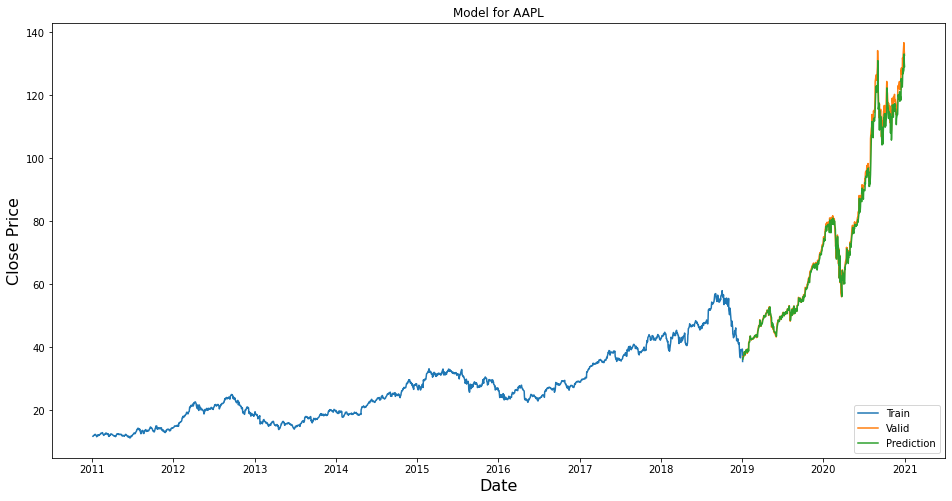

                 Close  Predictions
Date                               
2019-01-04   37.064999    36.244465
2019-01-07   36.982498    37.143147
2019-01-08   37.687500    37.281178
2019-01-09   38.327499    37.909595
2019-01-10   38.450001    38.529018
...                ...          ...
2020-12-24  131.970001   126.844536
2020-12-28  136.690002   128.028946
2020-12-29  134.869995   133.109085
2020-12-30  133.720001   130.167480
2020-12-31  132.690002   129.123123

[503 rows x 2 columns]
The accuracy of the LSTM Model predicting the movement of a stock each day is 47.599999999999994%
     Valid Movement  Predicted Movement
0                 1                   0
1                 0                   0
2                 0                   0
3                 0                   0
4                 1                   0
..              ...                 ...
497               0                   1
498               0                   0
499               1                   0
500       

In [16]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))

#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model for {}'.format(stock.upper()))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'],loc='lower right')
plt.show()

print (valid)

# find the accuracy based on predicting day-to-day movements 
valid_movement = []
pred_movement = []
close_prices = valid.Close.tolist()
pred_prices = valid.Predictions.tolist()
        
n = 0

for index, value in enumerate(close_prices[:-1]):
    if value > close_prices[index+1]: 
        valid_movement.append(1)
    else:
        valid_movement.append(0)

for index, value in enumerate(pred_prices[:-1]):
    if value > pred_prices[index+1]: 
        pred_movement.append(1)
    else:
        pred_movement.append(0)

for val, pred in zip(valid_movement, pred_movement):
    if val == pred:
        n=n+1
    else:
        pass

total = len(valid_movement)
accuracy = n/total
print (f'The accuracy of the LSTM Model predicting the movement of a stock each day is {100 * round(accuracy, 3)}%')

dataframe = pd.DataFrame(list(zip(valid_movement, pred_movement)), columns =['Valid Movement', 'Predicted Movement'])
print (dataframe)

#get predicted price for next day
last_60day = data[-60:].values
last_60day_scaled = scaler.transform(last_60day)
xx_test = []
xx_test.append(last_60day_scaled)
xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
pred = pred[0]
pred = pred[0]
print("The predicted price for the next trading day is: {}".format(round(pred, 2)))

#get stats
#Root mean squared error 
print (f'The root mean squared error is {round(rmse, 2)}')

error = mean_squared_error(valid['Close'].tolist(), valid['Predictions'].tolist())
print('Testing Mean Squared Error: %.3f' % error)

In [4]:
# Getting IEX data:
import pandas as pd
import pyEX as pyex
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
from env import token

credentials loaded successfully


In [7]:
c = pyex.Client(api_token=token, version='stable')

In [8]:
pyex.chart?

In [21]:
symbol ='AAPL'
timeframe ='1m'
df = c.chartDF(symbol = symbol, timeframe = timeframe)
close_prices = df[['close', 'volume']]

In [22]:
df

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2020-12-03,122.940,123.7800,122.2100,123.52,AAPL,78967630,HISTORICAL_PRICES,AAPL,,1607046488000,...,122.2100,78967630,123.52,122.940,123.7800,122.2100,78967630,"Dec 3, 20",0.000,0.0000
2020-12-04,122.250,122.8608,121.5200,122.60,AAPL,78260421,HISTORICAL_PRICES,AAPL,,1607134564000,...,121.5200,78260421,122.60,122.250,122.8608,121.5200,78260421,"Dec 4, 20",-0.690,-0.0056
2020-12-07,123.750,124.5700,122.2500,122.31,AAPL,86711990,HISTORICAL_PRICES,AAPL,,1607394454000,...,122.2500,86711990,122.31,123.750,124.5700,122.2500,86711990,"Dec 7, 20",1.500,0.0123
2020-12-08,124.380,124.9800,123.0900,124.37,AAPL,82225512,HISTORICAL_PRICES,AAPL,,1607489280000,...,123.0900,82225512,124.37,124.380,124.9800,123.0900,82225512,"Dec 8, 20",0.630,0.0051
2020-12-09,121.780,125.9500,121.0000,124.53,AAPL,115089193,HISTORICAL_PRICES,AAPL,,1607572082000,...,121.0000,115089193,124.53,121.780,125.9500,121.0000,115089193,"Dec 9, 20",-2.600,-0.0209
2020-12-10,123.240,123.8700,120.1500,120.50,AAPL,81312170,HISTORICAL_PRICES,AAPL,,1607653049000,...,120.1500,81312170,120.50,123.240,123.8700,120.1500,81312170,"Dec 10, 20",1.460,0.0120
2020-12-11,122.410,122.7600,120.5500,122.43,AAPL,86939786,HISTORICAL_PRICES,AAPL,,1607739364000,...,120.5500,86939786,122.43,122.410,122.7600,120.5500,86939786,"Dec 11, 20",-0.830,-0.0067
2020-12-14,121.780,123.3500,121.5400,122.60,AAPL,79075988,HISTORICAL_PRICES,AAPL,,1608004808000,...,121.5400,79075988,122.60,121.780,123.3500,121.5400,79075988,"Dec 14, 20",-0.630,-0.0051
2020-12-15,127.880,127.9000,124.1300,124.34,AAPL,157572262,HISTORICAL_PRICES,AAPL,,1608085925000,...,124.1300,157572262,124.34,127.880,127.9000,124.1300,157572262,"Dec 15, 20",6.100,0.0501


In [23]:
close_prices

,close,volume
date,,
2020-12-03,122.940,78967630
2020-12-04,122.250,78260421
2020-12-07,123.750,86711990
2020-12-08,124.380,82225512
2020-12-09,121.780,115089193
2020-12-10,123.240,81312170
2020-12-11,122.410,86939786
2020-12-14,121.780,79075988
2020-12-15,127.880,157572262


<AxesSubplot:xlabel='date'>

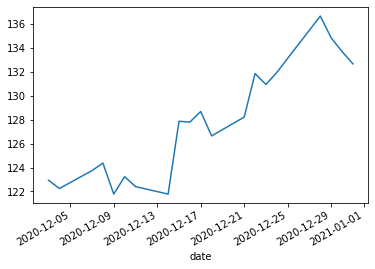

In [24]:
close_prices.close.plot()

<AxesSubplot:xlabel='date'>

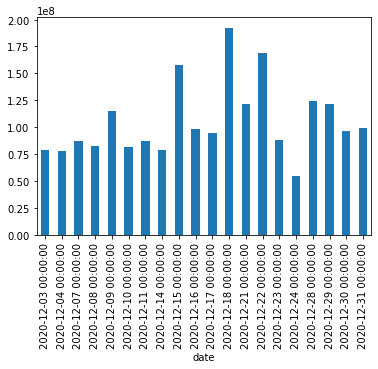

In [25]:
close_prices.volume.plot(kind = 'bar')

In [29]:
# Adding IEX or polygon.io data feeds next.

In [ ]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False)
m.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')

In [2]:
# Using iex

In [9]:
symbol ='TSLA'
timeframe ='1m'
df = c.chartDF(symbol = symbol, timeframe = timeframe)
close_prices = df[['close', 'volume']]

<AxesSubplot:xlabel='date'>

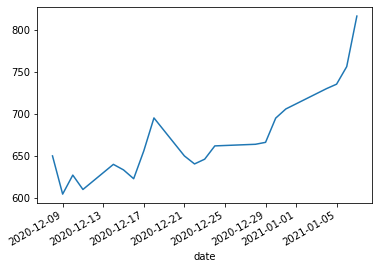

In [10]:
close_prices.close.plot()

<AxesSubplot:xlabel='date'>

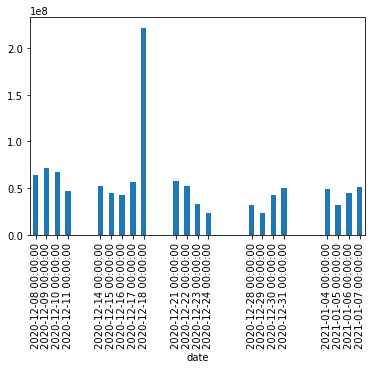

In [11]:
close_prices.volume.plot(kind = 'bar')